## MFE Heatmap
For this map, we are going to plot the mfe for each seed match. For more information on how the MFE was calculated for each seed match, check out the "MFE rank plot" project, which goes in-depth regarding ViennaRNA and MFE calculation

In [2]:
import csv
def get_dict(filename):
    dict_from_csv = {}

    with open(filename+'.csv', mode='r') as inp:
        reader = csv.reader(inp)
        dict_from_csv = {rows[0]:rows[1] for rows in reader}
    return dict_from_csv

def print_map(filename, map_):
    df=pd.DataFrame(map_)
    df.to_csv(filename+'.csv', index= False, header = False)

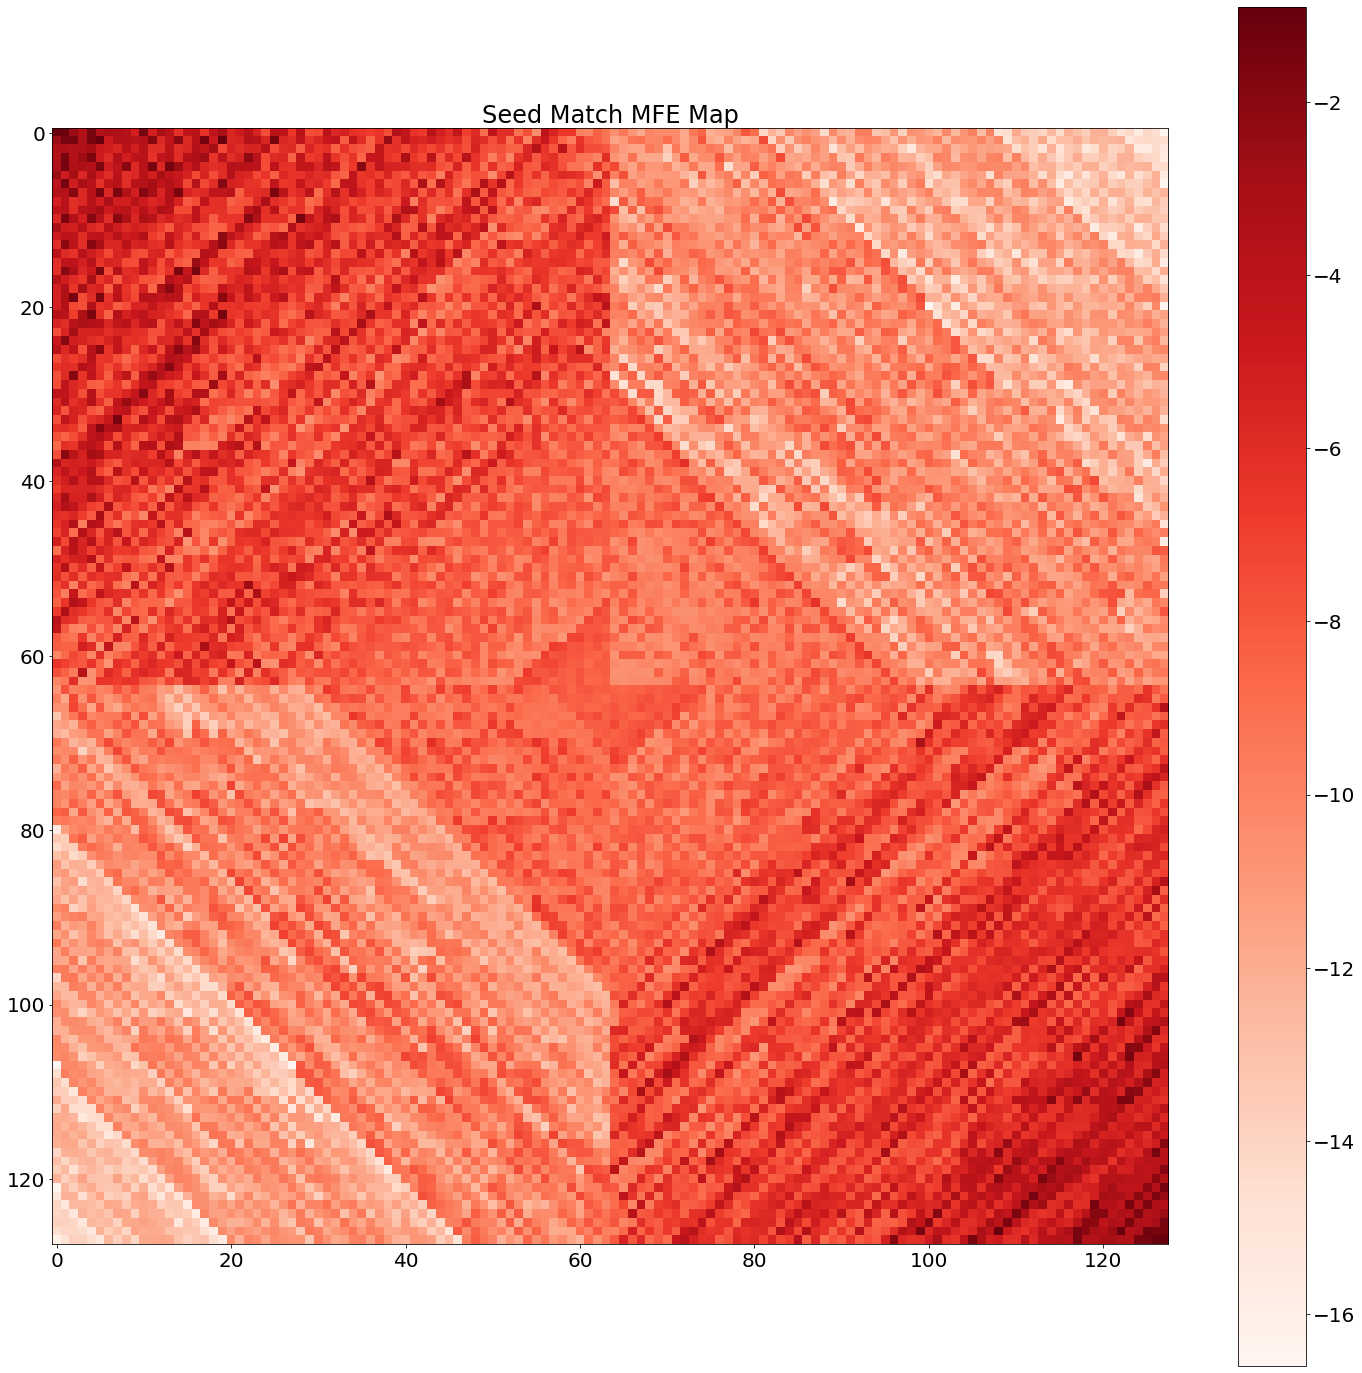

In [18]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.colors as colors

import numpy as np

SIZE = 7

def mfe_heatmap(filename):
    #pull mfe dict
    mfe_dict = get_dict(filename)
    
    #create the dictionary from 7-seq
    df = pd.read_csv("AGTC-7seq.csv", header = None)
    data_arr = np.array(df).flatten()

    data_dict = {data_arr[i]: 0 for i in range(0, len(data_arr))}
    
    #Update the dictionary:
    for i in mfe_dict:
        data_dict[i] = mfe_dict[i]
        
     #Convert dictionary back into 1D array
    data_arr1 = np.array(list(data_dict.values()))

    #Convert 1D array back into a 2D array
    data_arr2 = np.reshape(data_arr1, (2**SIZE,2**SIZE))

    #save the map as a csv
    print_map(filename+"_map", data_arr2)
    
    #map 2D array
    df = pd.read_csv(filename+"_map.csv", header = None)

    fig = plt.figure(figsize=(25,25))
    plt.imshow(df,cmap="Reds")
    plt.rc('font', size=20)
    plt.title(filename+" Map")
    plt.colorbar()
    plt.savefig(filename+" Map")
    plt.show()
    
mfe_heatmap("Seed Match MFE")

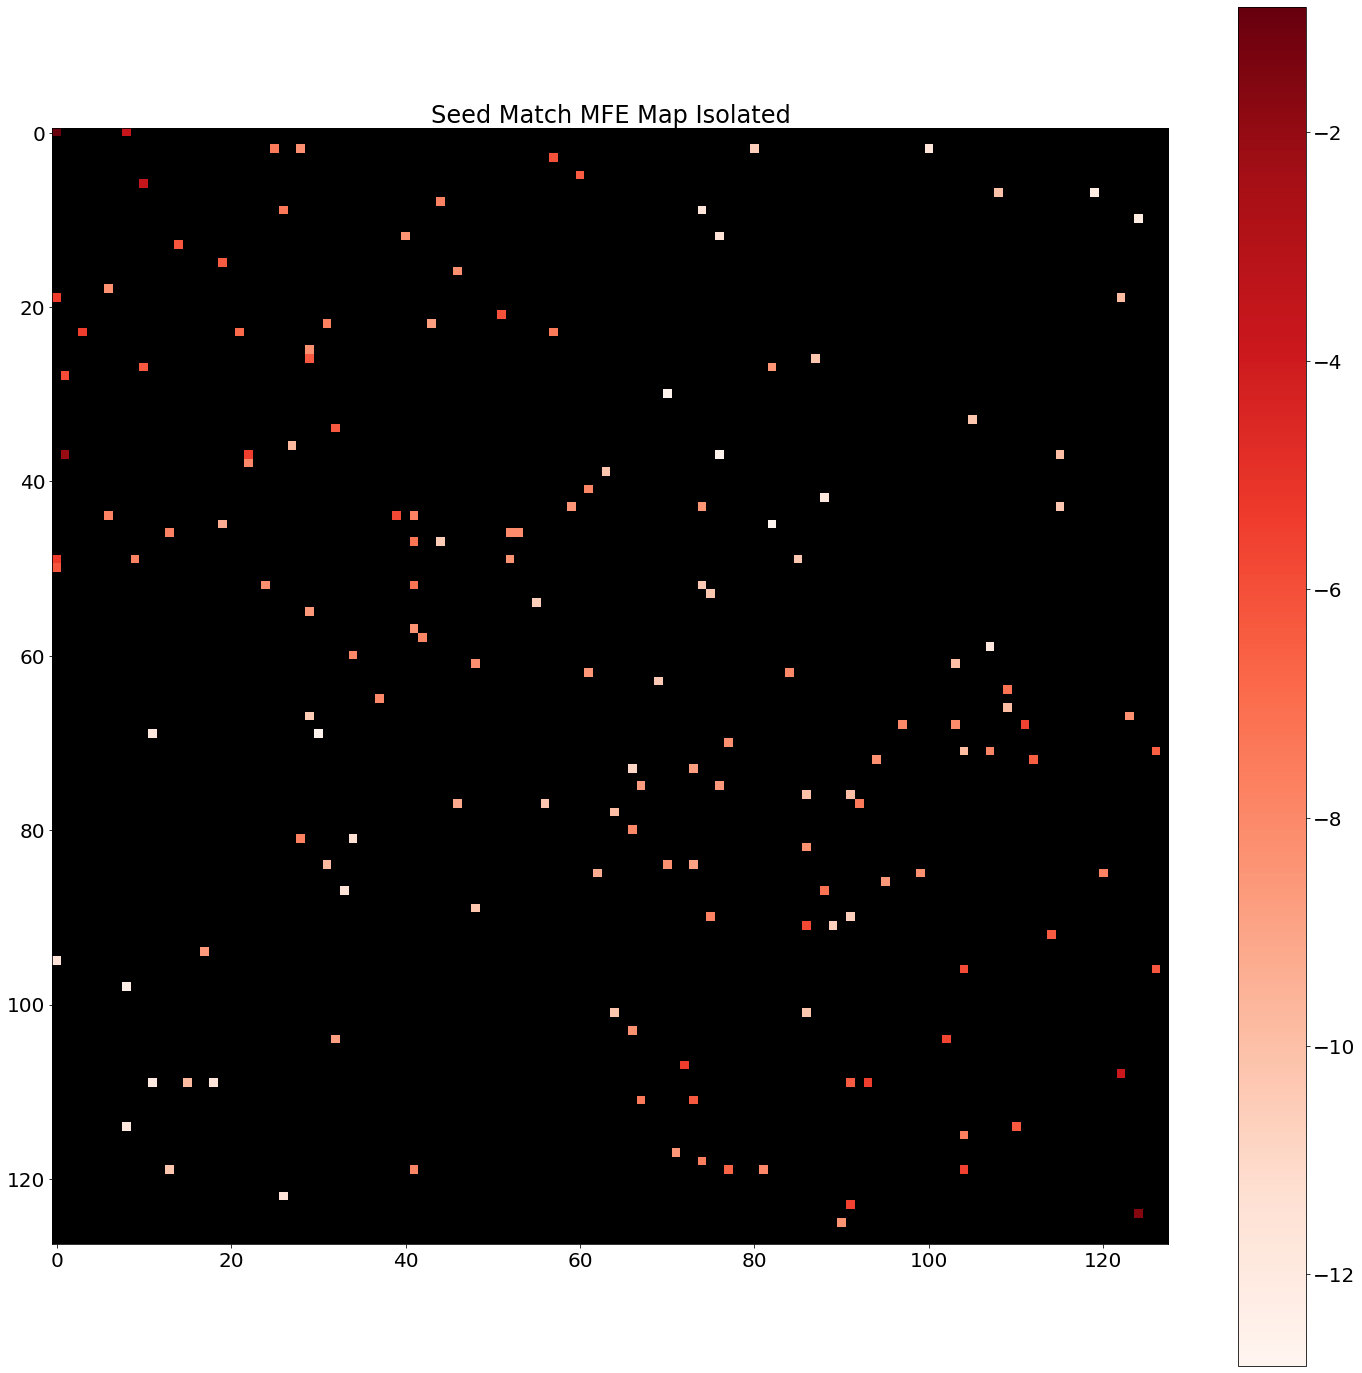

In [17]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from numpy import loadtxt
import numpy as np

SIZE = 7

def mfe_heatmap_isolated(filename):
    #pull mfe dict
    mfe_dict = get_dict(filename)
    
    #get all seed matches for miRNA
    seed_match_data = loadtxt("dre_mature_match.txt", comments=">", delimiter="\z",dtype="str")
    
    #create the dictionary from 7-seq
    df = pd.read_csv("AGTC-7seq.csv", header = None)
    data_arr = np.array(df).flatten()

    data_dict = {data_arr[i]: 0 for i in range(0, len(data_arr))}
    
    #Update the dictionary. if seed match isn't present in seed_match_data, mask it
    for i in mfe_dict:
        if(i in seed_match_data):
            data_dict[i] = mfe_dict[i]
        else:
            data_dict[i] = 999
    
    #Convert dictionary back into 1D array
    data_arr1 = np.array(list(data_dict.values()))

    #Convert 1D array back into a 2D array
    data_arr2 = np.reshape(data_arr1, (2**SIZE,2**SIZE))

    #save the map as a csv
    print_map(filename+"_map", data_arr2)
    
    #map 2D array
    df = pd.read_csv(filename+"_map.csv", header = None)
    
    #set all 0s to black
    df= np.ma.masked_where(df>998, df)
    cmap_reds = mpl.cm.get_cmap("Reds")
    cmap_reds.set_bad(color='black')

    fig = plt.figure(figsize=(25,25))
    plt.imshow(df,cmap="Reds")
    plt.rc('font', size=20)
    plt.title(filename+" Map Isolated")
    plt.colorbar()
    plt.savefig(filename+" Map Isolated")
    plt.show()
    
mfe_heatmap_isolated("Seed Match MFE")